In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision.datasets import CIFAR10

In [4]:
#datasets & DataLoader
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# image =>  scale(0,1)  => normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = CIFAR10(root = "./data",train = True, download = True, transform = transform)
testset = CIFAR10(root = "./data",train = False, download = True, transform = transform)

In [5]:
trainloader = DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = DataLoader(testset, batch_size = 64)

### Build the CNN

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32,kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), #kernel size = 2, stride = 2

            nn.Conv2d(32, 64,kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), #kernel size = 2, stride = 2

            nn.Conv2d(64, 128,kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2) #kernel size = 2, stride = 2
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(4*4*128, 256),
            nn.ReLU(),

            nn.Linear(256, 10)  #oUTPUT LAYER
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1) #FLATTENING 
        x = self.fc_layers(x)
        return x

In [7]:
model = CNN()

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

### Training the CNN

In [20]:
val_losses = []
train_losses = []

best_val_loss = float("inf")
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0

    for images, labels in trainloader:
        optimizer.zero_grad()
        
        output = model.forward(images)  #forward propagation
        loss = criterion(output, labels)
        loss.backward() #backward propagation
        optimizer.step() #update params

        running_loss += loss.item()
        
    epoch_train_loss = running_loss/ len(trainloader)
    train_losses.append(epoch_train_loss)

    #validation losses
    model.eval()
    running_val_loss = 0.0

    with torch.no_grad():
       for images, labels in testloader:
        output = model.forward(images)  #forward propagation
        loss = criterion(output, labels)
        running_val_loss += loss.item()
        
    epoch_val_loss = running_val_loss/len(testloader)
    val_losses.append(epoch_val_loss)

    print(f"epoch : {epoch + 1}/{epochs} ==> train_loss = {epoch_train_loss} & val loss = {epoch_val_loss}")
    if(epoch_val_loss < best_val_loss):
        best_val_loss = epoch_val_loss
        torch.save(model.state_dict(),"best_cnn_for_cifar.pt")

epoch : 1/10 ==> train_loss = 0.1256842538833504 & val loss = 1.198436150125637
epoch : 2/10 ==> train_loss = 0.10924921490733161 & val loss = 1.3136613699281292
epoch : 3/10 ==> train_loss = 0.0994137060969039 & val loss = 1.343263788587728
epoch : 4/10 ==> train_loss = 0.09213437122897819 & val loss = 1.4875161454176447
epoch : 5/10 ==> train_loss = 0.080469257178028 & val loss = 1.5732908996806783
epoch : 6/10 ==> train_loss = 0.08302333456722548 & val loss = 1.5753048316688294
epoch : 7/10 ==> train_loss = 0.07069960997595935 & val loss = 1.6124484227721099
epoch : 8/10 ==> train_loss = 0.0740696020508328 & val loss = 1.690135184746639
epoch : 9/10 ==> train_loss = 0.07127244144310708 & val loss = 1.7545257742237892
epoch : 10/10 ==> train_loss = 0.06631776756863646 & val loss = 1.9444118138331516


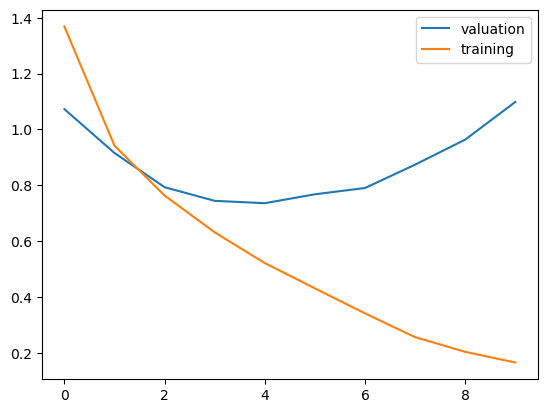

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

loss_df = pd.DataFrame({
    "valuation loss" : val_losses,
    "training loss" : train_losses
})

plt.plot(loss_df["valuation loss"],label = "valuation")
plt.plot(loss_df["training loss"], label = "training")
plt.xlabel()
plt.legend()

In [28]:
#Evaluate ou8r CNN

correct_labels = 0
total_labels = 0

model.eval()

with torch.no_grad():
    for images, labels in testloader:
        outputs = model.forward(images)
        _, predicted = torch.max(outputs, 1)

        correct_labels += (predicted == labels).sum().item()
        total_labels += labels.size(0)

print(f"accuracy = {correct_labels / total_labels * 100} ")        

accuracy = 75.89 
